In [1]:
from func import *
import matplotlib.pyplot as plt
from multiprocessing import Pool
import matplotlib.colors as colors
from meer21cm.power import bin_3d_to_cy

/Users/zhaotingchen/miniconda3/envs/pmesh/lib/python3.10/site-packages/halomod/halo_model.py:32: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  from .halo_exclusion import NoExclusion


Note: redshifts have been re-sorted (earliest first)
no input beam found, setting include_beam to False
Note: redshifts have been re-sorted (earliest first)
no input beam found, setting include_beam to False


/Users/zhaotingchen/miniconda3/envs/pmesh/lib/python3.10/site-packages/numpy/fft/helper.py:162: RuntimeWarning: divide by zero encountered in scalar divide
  val = 1.0 / (n * d)
/Users/zhaotingchen/miniconda3/envs/pmesh/lib/python3.10/site-packages/numpy/fft/helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


In [ ]:
with Pool(4) as pool:
    pool.map(run_one_realization, range(100))

In [2]:
power_cleaned = []
power_model = []
power_model_conv = []
R_mat = []
R_mat_fourier = []
power_out_renorm = []
for i in range(100):
    power_cleaned.append(np.load(f'temp/power_cleaned_{i}.npy'))
    power_model.append(np.load(f'temp/power_model_{i}.npy'))
    power_model_conv.append(np.load(f'temp/power_model_conv_{i}.npy'))
    R_mat.append(np.load(f'temp/R_mat_{i}.npy'))
    R_mat_fourier.append(np.load(f'temp/R_mat_fourier_{i}.npy'))
    qe_renorm = (np.abs(R_mat_fourier[i])**2).sum(0)
    power_out_renorm.append(power_cleaned[i]/qe_renorm[None,None,:])

power_cleaned = np.array(power_cleaned)
power_model = np.array(power_model)
power_model_conv = np.array(power_model_conv)
R_mat = np.array(R_mat)
R_mat_fourier = np.array(R_mat_fourier)
power_out_renorm = np.array(power_out_renorm)





In [3]:
mock = MockSimulation(
    ra_range = ra_range_MK,
    dec_range = dec_range_MK,
    tracer_bias_1 = 1.5,
    mean_amp_1 = 'average_hi_temp',
    density='gaussian',
)
mock.box_len = np.array([
    mock.pix_resol_in_mpc * mock.num_pix_x,
    mock.pix_resol_in_mpc * mock.num_pix_y,
    mock.los_resol_in_mpc * mock.nu.size,
])
mock.box_ndim = np.array([mock.num_pix_x, mock.num_pix_y, mock.nu.size])
mock.propagate_field_k_to_model()
mock.kperpbins = kperpedges
mock.kparabins = kparaedges


Note: redshifts have been re-sorted (earliest first)
no input beam found, setting include_beam to False
Note: redshifts have been re-sorted (earliest first)
no input beam found, setting include_beam to False


/Users/zhaotingchen/miniconda3/envs/pmesh/lib/python3.10/site-packages/numpy/fft/helper.py:162: RuntimeWarning: divide by zero encountered in scalar divide
  val = 1.0 / (n * d)
/Users/zhaotingchen/miniconda3/envs/pmesh/lib/python3.10/site-packages/numpy/fft/helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


In [4]:
mock.k1dbins = np.geomspace(0.005,3,11)

In [16]:
ps_cy_model = []
ps_cy_cleaned = []
ps_cy_model_conv = []
ps_cy_out_renorm = []
ps_1d_model = []
ps_1d_renorm = []
ps_1d_model_conv = []
ps_1d_cleaned = []
for i in range(100):
    ps_cy_model_i,_ = mock.get_cy_power(power_model[i])
    ps_cy_cleaned_i,_ = mock.get_cy_power(power_cleaned[i])
    ps_cy_model_conv_i,_ = mock.get_cy_power(power_model_conv[i])
    ps_cy_out_renorm_i,_ = mock.get_cy_power(power_out_renorm[i])
    ps_cy_model.append(ps_cy_model_i)
    ps_cy_cleaned.append(ps_cy_cleaned_i)
    ps_cy_model_conv.append(ps_cy_model_conv_i)
    ps_cy_out_renorm.append(ps_cy_out_renorm_i)
    ps_1d_model_i,keff,_ = mock.get_1d_power(power_model[i])
    ps_1d_renorm_i,_,_ = mock.get_1d_power(power_out_renorm[i])
    ps_1d_model_conv_i,_,_ = mock.get_1d_power(power_model_conv[i])
    ps_1d_cleaned_i,_,_ = mock.get_1d_power(power_cleaned[i])
    ps_1d_model.append(ps_1d_model_i)
    ps_1d_renorm.append(ps_1d_renorm_i)
    ps_1d_model_conv.append(ps_1d_model_conv_i)
    ps_1d_cleaned.append(ps_1d_cleaned_i)



In [17]:
ps_cy_model = np.array(ps_cy_model)
ps_cy_cleaned = np.array(ps_cy_cleaned)
ps_cy_model_conv = np.array(ps_cy_model_conv)
ps_cy_out_renorm = np.array(ps_cy_out_renorm)


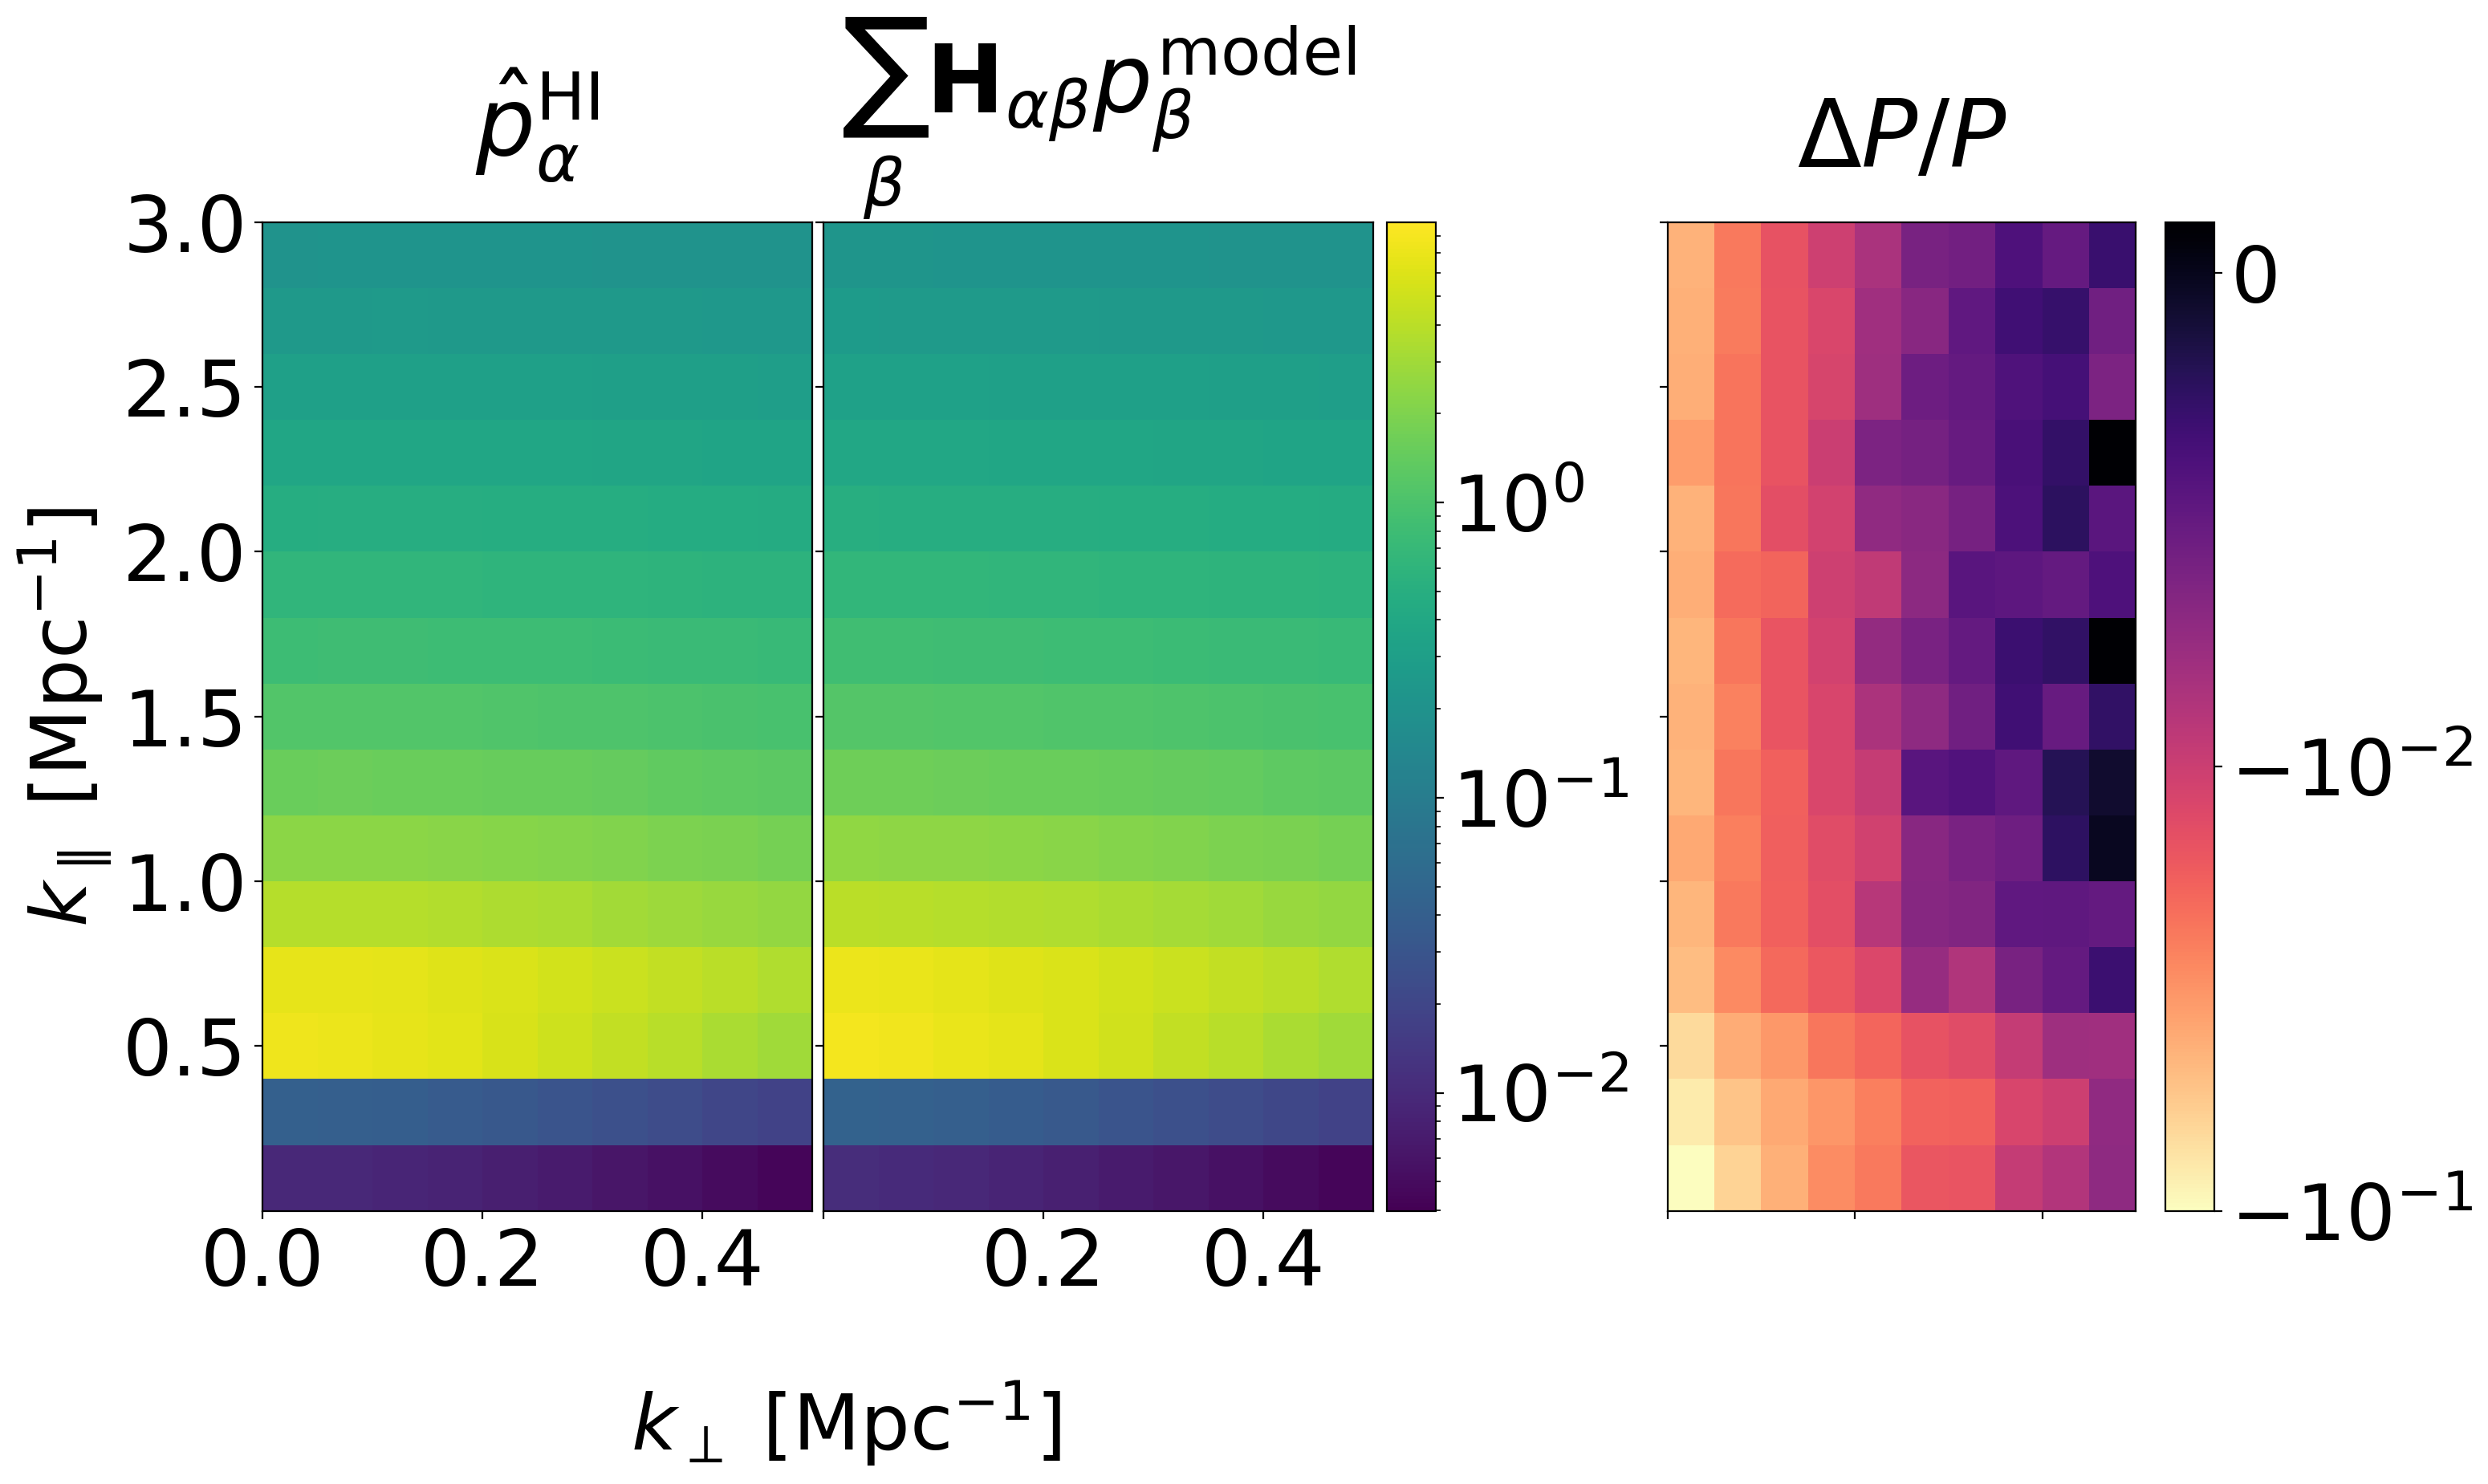

In [230]:
plt.rcParams['font.size'] = 35
gs_left = plt.GridSpec(nrows=1, ncols=3, wspace=0.02)
gs_right = plt.GridSpec(nrows=1, ncols=3, wspace=0.2)
fig = plt.figure(figsize=(16,8),)
ax = fig.add_subplot(gs_left[0,0]) # Create the first one, then add others...
other_axes = [fig.add_subplot(gs_left[0,i]) for i in range(1, 2)]
left_axes = [ax] + other_axes
finalax = fig.add_subplot(gs_right[:,-1])

axes = left_axes + [finalax,]
ax = axes[0]
ax.pcolormesh(kperpedges,kparaedges,(ps_cy_cleaned.mean(0).T*1e6),
              norm = colors.LogNorm(vmin=10**(-2.4),vmax=10**(0.95))
              )
ax.set_title(r'$\hat{p}^{\rm HI}_{\alpha}$',pad=30)
#ax.set_xlabel(r'$k_\perp$ [Mpc$^{-1}$]')
ax.set_ylabel(r'$k_\parallel$ [Mpc$^{-1}$]')
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_xticks([0.0,0.2,0.4,])

ax = axes[1]
im = ax.pcolormesh(kperpedges,kparaedges,(ps_cy_model_conv.mean(0).T*1e6),
                   norm = colors.LogNorm(vmin=10**(-2.4),vmax=10**(0.95))
                   )
#ax.set_title('HI Model'+'\n'+ r'with $\mathbf{H}$')
ax.set_title(r'$\sum_{\beta}\mathbf{H}_{\alpha\beta}{p}^{\rm model}_{\beta}$')
#ax.set_xlabel(r'$k_\perp$ [Mpc$^{-1}$]')
ax.text(-0.35,-0.17,r'$k_\perp$ [Mpc$^{-1}$]',ha='left',va='top',transform=ax.transAxes)
ax.set_xticks([0.0,0.2,0.4])
ax.set_xticklabels(['',0.2,0.4])
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_yticklabels([])
cbar = plt.colorbar(im, ax=[axes[0],axes[1]],pad=0.01)
#cbar.set_label(r'$P_{\rm HI}$ [Mpc$^3$$\,$mK$^{2}$]')

ax = axes[2]
im = ax.pcolormesh(
    kperpedges,kparaedges,(ps_cy_cleaned.mean(0).T/ps_cy_model_conv.mean(0).T)-1,
    cmap='magma_r',
    norm=colors.SymLogNorm(linthresh=0.01,vmin=-0.1, base=10)
)
cbar = plt.colorbar(im, ax=[axes[2],])
#cbar.set_label(r'$\Delta P/P$')
ax.set_title(r'$\Delta P/P$',pad=25)
#ax.set_xlabel(r'$k_\perp$ [Mpc$^{-1}$]')
ax.set_xticks([0.0,0.2,0.4,])
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_yticklabels([])
ax.set_xticklabels([])

#plt.savefig('pscy1.png',bbox_inches='tight')


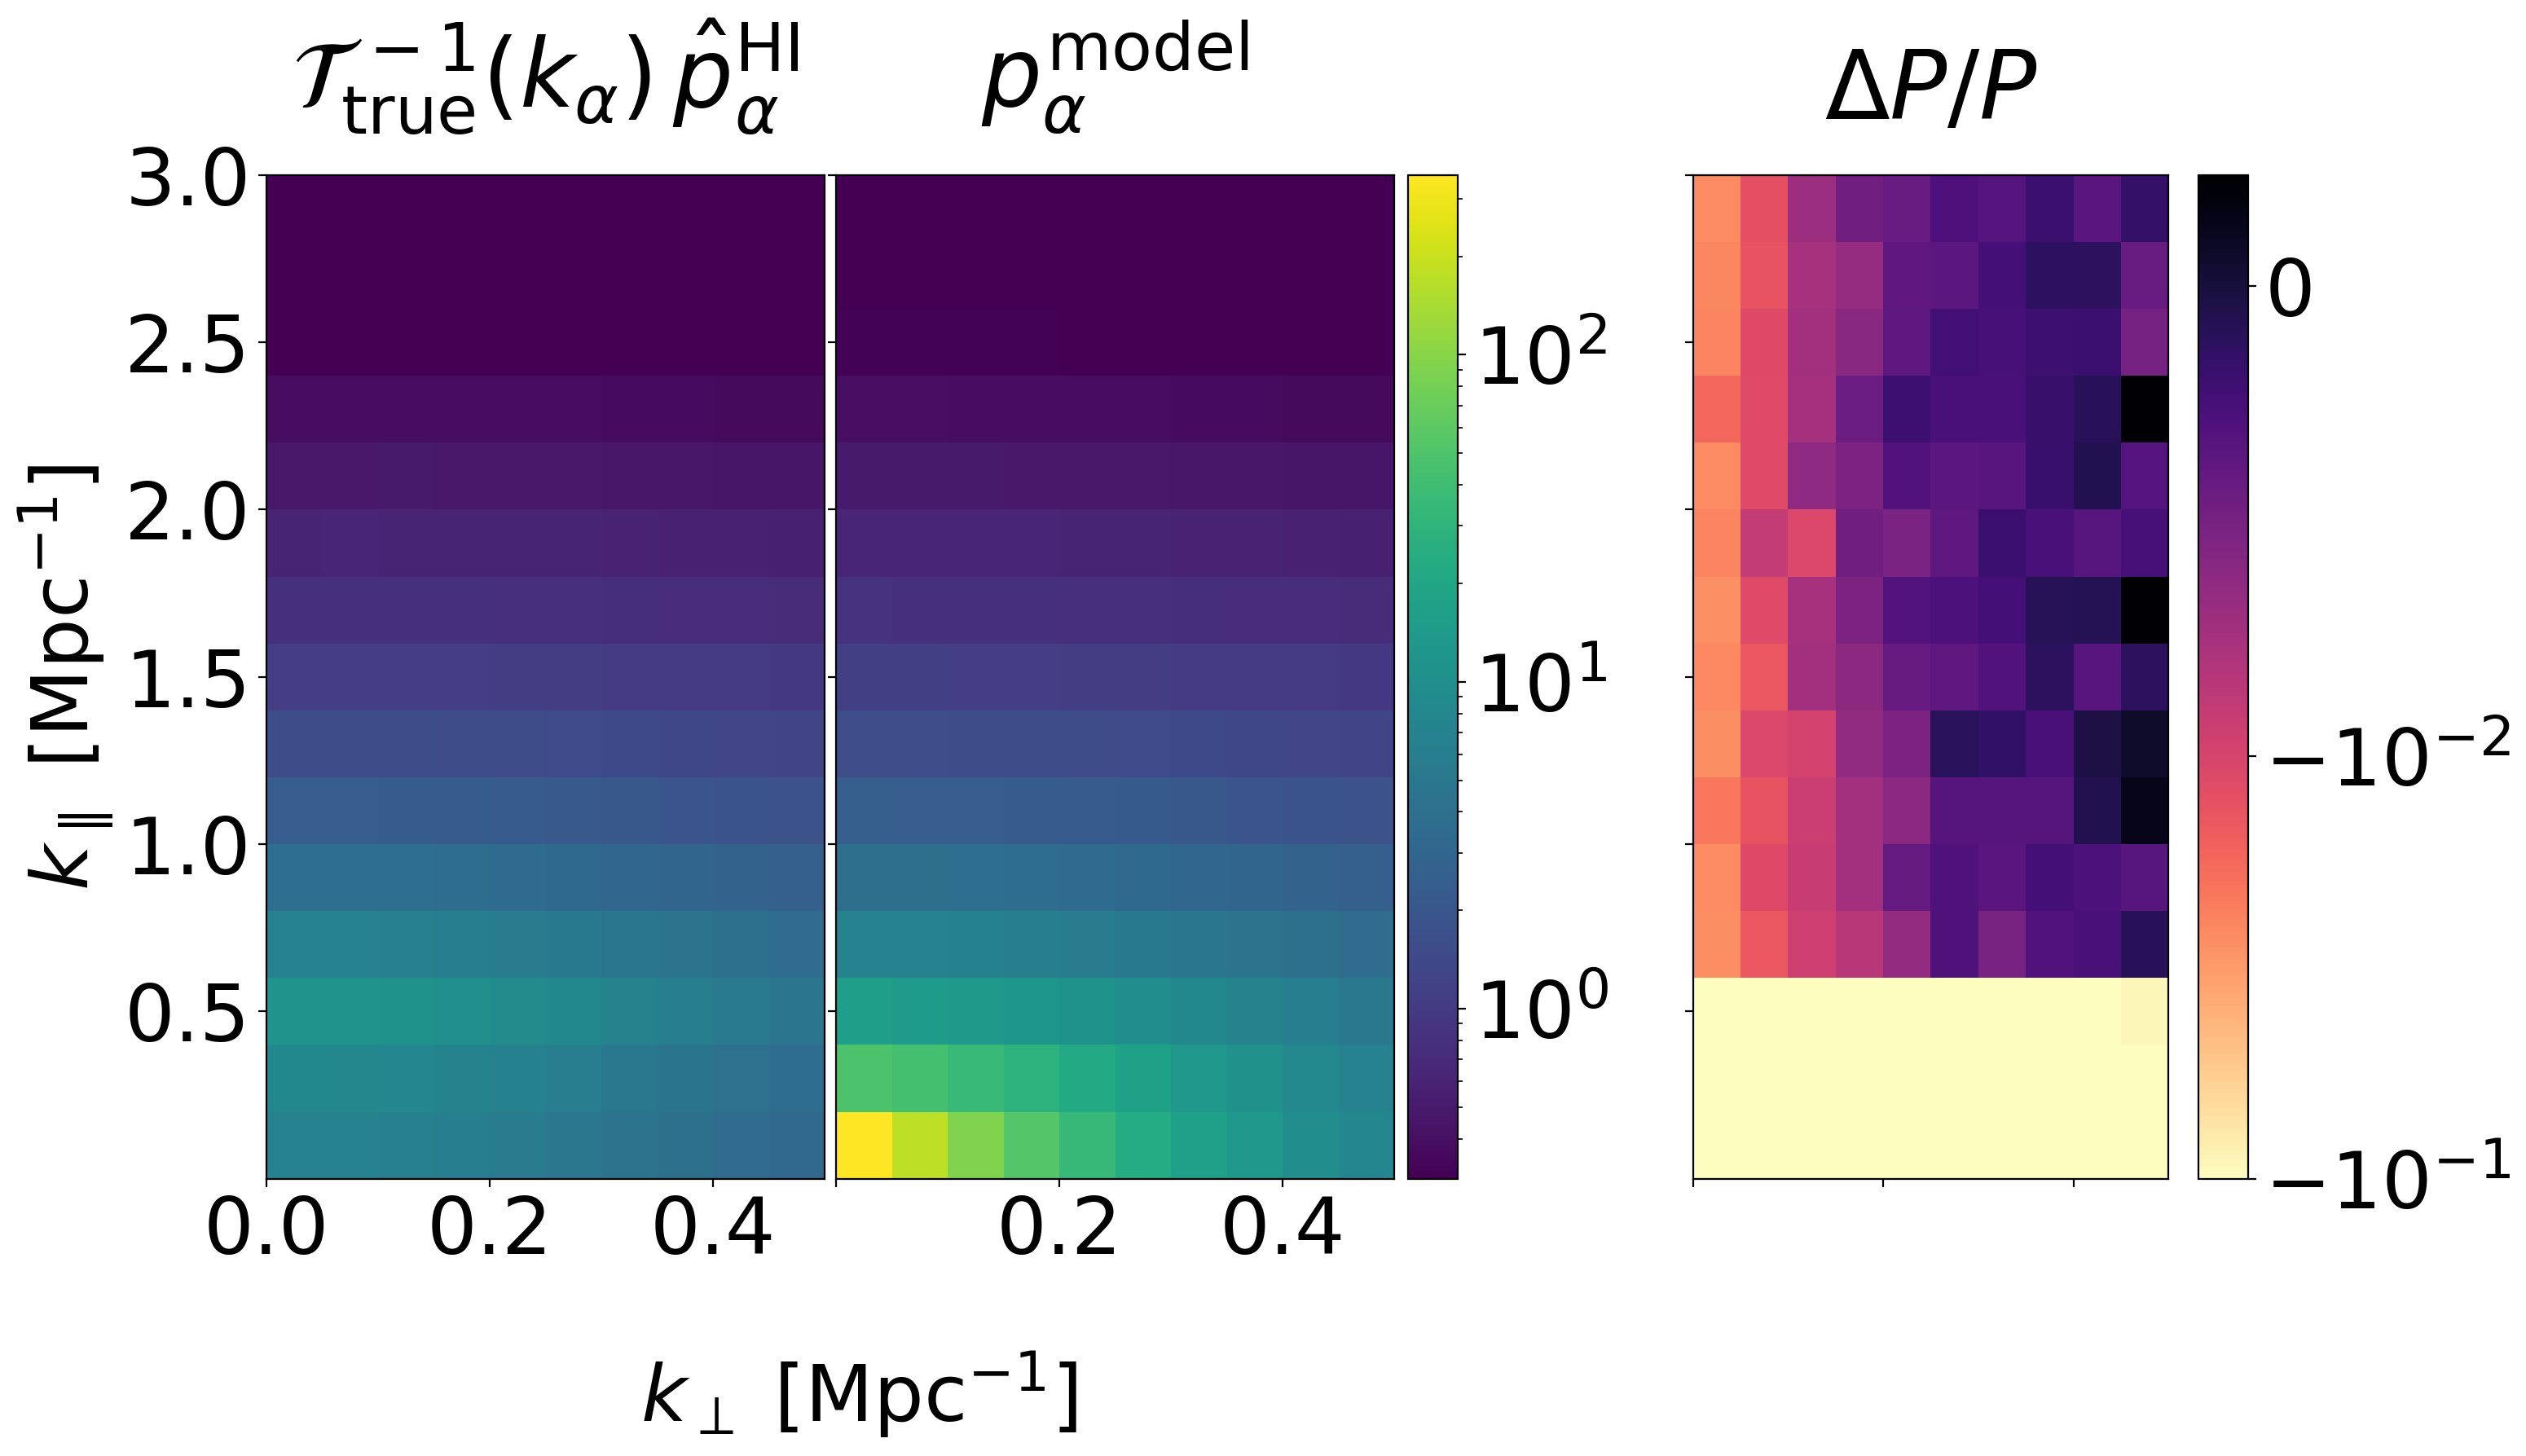

In [21]:
plt.rcParams['font.size'] = 35
gs_left = plt.GridSpec(nrows=1, ncols=3, wspace=0.02)
gs_right = plt.GridSpec(nrows=1, ncols=3, wspace=0.2)
fig = plt.figure(figsize=(16,8),dpi=200,)
ax = fig.add_subplot(gs_left[0,0]) # Create the first one, then add others...
other_axes = [fig.add_subplot(gs_left[0,i]) for i in range(1, 2)]
left_axes = [ax] + other_axes
finalax = fig.add_subplot(gs_right[:,-1])

axes = left_axes + [finalax,]
ax = axes[0]
ax.pcolormesh(kperpedges,kparaedges,(ps_cy_out_renorm.mean(0).T*1e6),
              norm = colors.LogNorm(vmin=10**(-0.52),vmax=10**(2.55))
              )
ax.set_title(r'$\mathcal{T}^{\:-1}_{\rm true}(k_\alpha)\,\hat{p}^{\rm HI}_{\alpha}$',pad=30)
#ax.set_title('HI after PCA\n'+ r'with $\mathcal{T}^{\:-1}$')
#ax.set_xlabel(r'$k_\perp$ [Mpc$^{-1}$]')
ax.set_ylabel(r'$k_\parallel$ [Mpc$^{-1}$]')
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_xticks([0.0,0.2,0.4,])

ax = axes[1]
im = ax.pcolormesh(kperpedges,kparaedges,(ps_cy_model.mean(0).T*1e6),
                   norm = colors.LogNorm(vmin=10**(-0.52),vmax=10**(2.55))
                   )
#ax.set_title(r'HI Model')
ax.set_title(r'${p}^{\rm model}_{\alpha}$',pad=30)
#ax.set_xlabel(r'$k_\perp$ [Mpc$^{-1}$]')
ax.text(-0.35,-0.17,r'$k_\perp$ [Mpc$^{-1}$]',ha='left',va='top',transform=ax.transAxes)
ax.set_xticks([0.0,0.2,0.4,])
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_xticklabels(['',0.2,0.4])
ax.set_yticklabels([])
cbar = plt.colorbar(im, ax=[axes[0],axes[1]],pad=0.01)
#cbar.set_label(r'$P_{\rm HI}$ [Mpc$^3$$\,$mK$^{2}$]')

ax = axes[2]
im = ax.pcolormesh(
    kperpedges,kparaedges,(ps_cy_out_renorm.mean(0).T/ps_cy_model.mean(0).T)-1,
    cmap='magma_r',
    norm=colors.SymLogNorm(linthresh=0.01,vmin=-0.1, base=10)
)
cbar = plt.colorbar(im, ax=[axes[2],])
ax.set_title(r'$\Delta P/P$',pad=25)
ax.set_xticks([0.0,0.2,0.4,])
ax.set_yticks([0.5,1.0,1.5,2.0,2.5,3.0])
ax.set_yticklabels([])
ax.set_xticklabels([])
#plt.savefig('pscy2.png',bbox_inches='tight')


In [114]:
Hab_plt = np.fft.fftshift(np.abs(R_mat_fourier)**2,axes=[1,2]).mean(0)
qe_renorm = (Hab_plt).sum(0)
kpara_bins = center_to_edges(np.fft.fftshift(mock.k_para))

In [124]:
W_ab = 1/qe_renorm[:,None] * Hab_plt
# there is numerical error in qe_renorm due to qe_renorm being very small, so we need to normalize W_ab
# note that W_ab is purely for visualization, and is not used for any other purpose
W_ab = 1/W_ab.sum(0)[None,:] * W_ab
W_ab = (W_ab.T + W_ab)/2


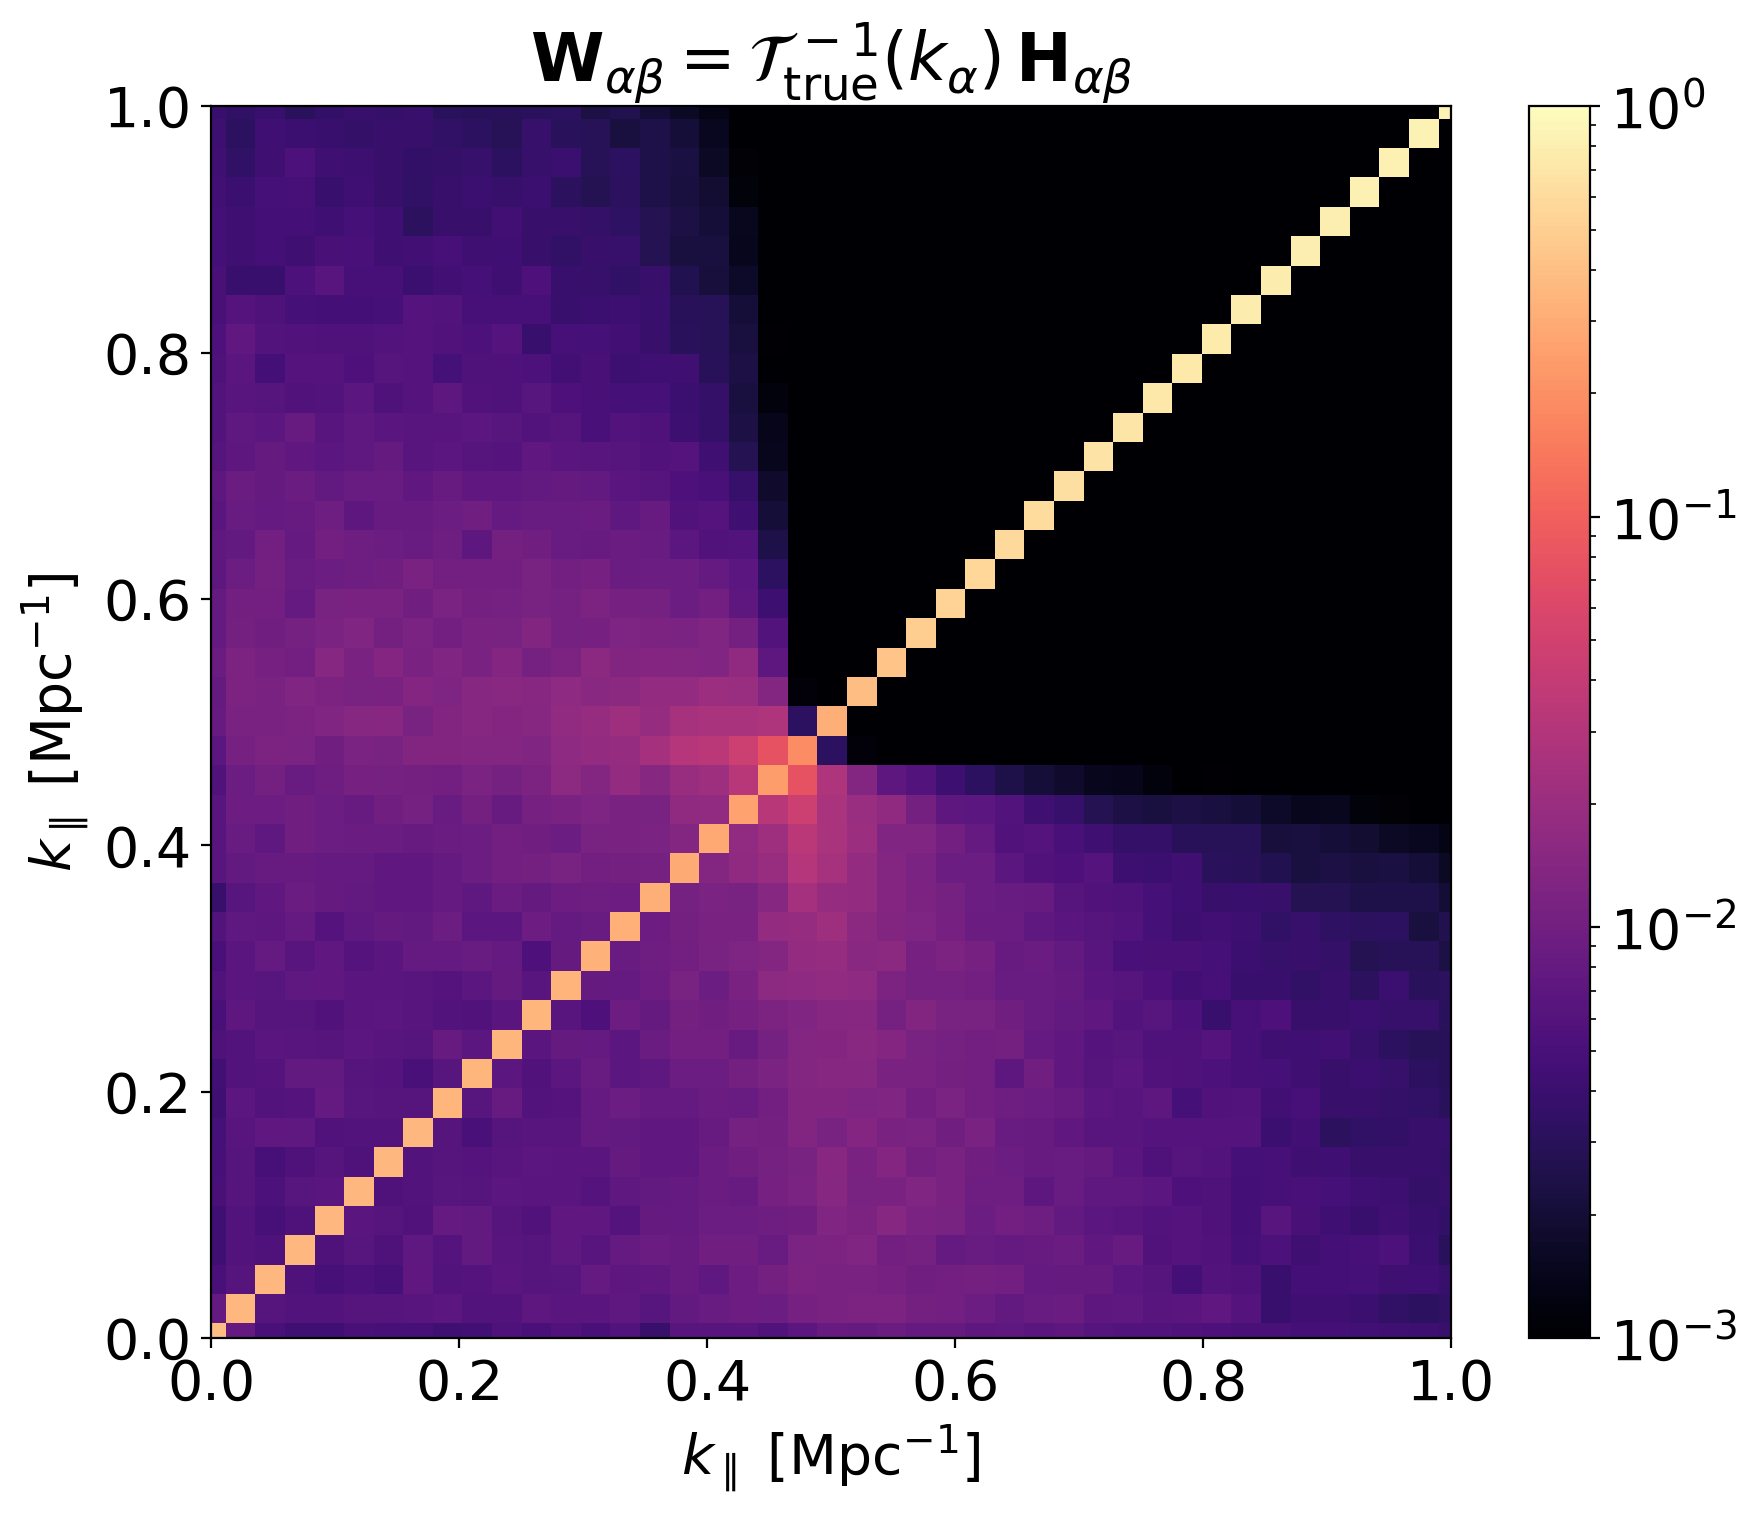

In [ ]:
plt.figure(figsize=(10,8))
plt.pcolormesh(kpara_bins,kpara_bins,(W_ab),
               norm=colors.LogNorm(vmin=1e-3,vmax=1),
               cmap='magma'
               )
plt.colorbar()
plt.xlabel(r'$k_\parallel$ [Mpc$^{-1}$]')
plt.ylabel(r'$k_\parallel$ [Mpc$^{-1}$]')
plt.title(r'$\mathbf{W}_{\alpha\beta} = \mathcal{T}^{\: -1}_{\rm true}(k_\alpha)\,\mathbf{H}_{\alpha\beta}$')
plt.xlim(0,1.0)
plt.ylim(0,1.0)
ax = plt.gca()
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
#plt.savefig('window.png',bbox_inches='tight')


In [27]:
qe_renorm = (np.abs(R_mat_fourier)**2).sum(1)
qe_renorm_cross = np.fft.ifftshift(
    np.diagonal(
        np.fft.fftshift(R_mat_fourier,axes=[1,2]).real,
        axis1=1,
        axis2=2,
    ),
    axes=[1]
)

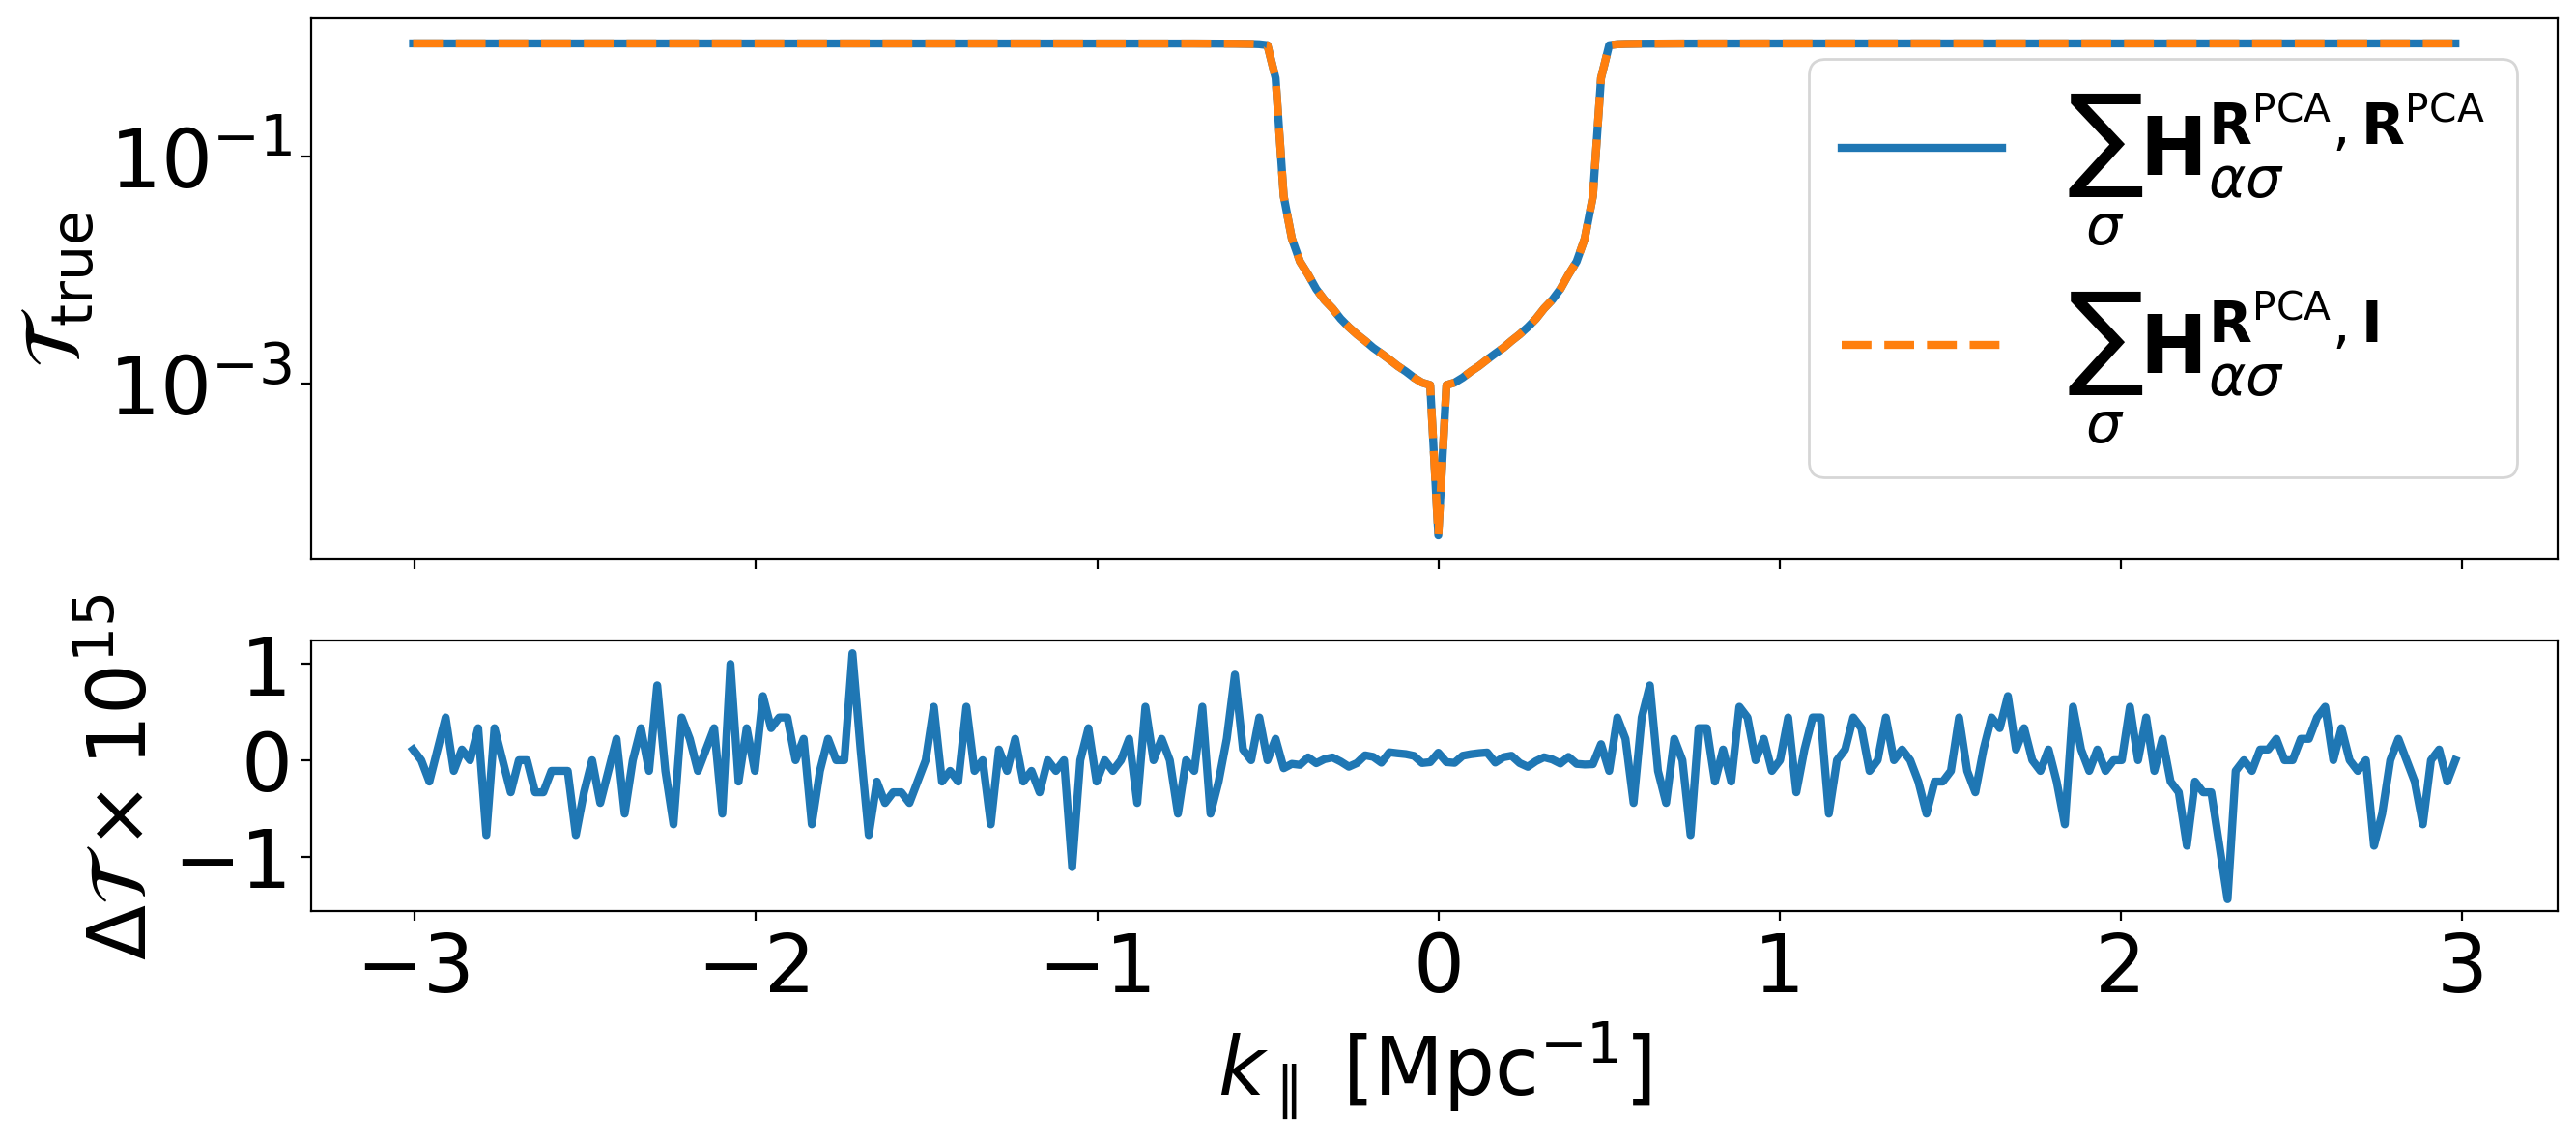

In [29]:
k_para_plt = np.fft.fftshift(mock.k_para)

plt.rcParams['font.size'] = 30
fig,axes = plt.subplots(2,1,figsize=(15,6),sharex=True,height_ratios=[2,1],dpi=200)
ax = axes[0]
ax.plot(k_para_plt,np.fft.fftshift(qe_renorm).mean(0),
         label=r'$\sum_{\sigma} \mathbf{H}_{\alpha\sigma}^{\mathbf{R}^{\rm PCA},\mathbf{R}^{\rm PCA}}$',
         lw=3)
ax.plot(k_para_plt,np.fft.fftshift(qe_renorm_cross.mean(0)),
        label=r'$\sum_{\sigma} \mathbf{H}_{\alpha\sigma}^{\mathbf{R}^{\rm PCA},\mathbf{I}}$',
        ls='--',lw=3)
ax.set_ylabel(r'$\mathcal{T}_{\rm true}$')
ax.set_yscale('log')
ax.legend()

ax = axes[1]
ax.plot(k_para_plt,np.fft.fftshift(qe_renorm_cross.mean(0)-qe_renorm.mean(0))*1e15,
        lw=3)
ax.set_xlabel(r'$k_\parallel$ [Mpc$^{-1}$]')
ax.set_ylabel(r'$\Delta \mathcal{T} \times 10^{15}$')
plt.savefig('delta_T.png',bbox_inches='tight')

In [ ]:
W_ab_unshift = np.fft.ifftshift(W_ab)

In [233]:
wf_visual_bins = np.geomspace(0.005,3,11)

In [234]:
wf_visual = np.zeros((len(keff),len(wf_visual_bins)-1))

In [235]:
for kbin_i in range(len(keff)):
    kbin_sel = np.where((mock.kmode>=mock.k1dbins[kbin_i]) & (mock.kmode<mock.k1dbins[kbin_i+1]))
    count_i,_ = np.histogram(
        (mock.k_perp[kbin_sel[:2]][:,None]**2 + mock.k_para[None,:]**2).ravel(),
        bins=wf_visual_bins,
        weights=(W_ab_unshift[kbin_sel[-1]]).ravel(),
    )
    count_i /= count_i.sum()
    wf_visual[kbin_i] = count_i

<Figure size 3600x1800 with 0 Axes>

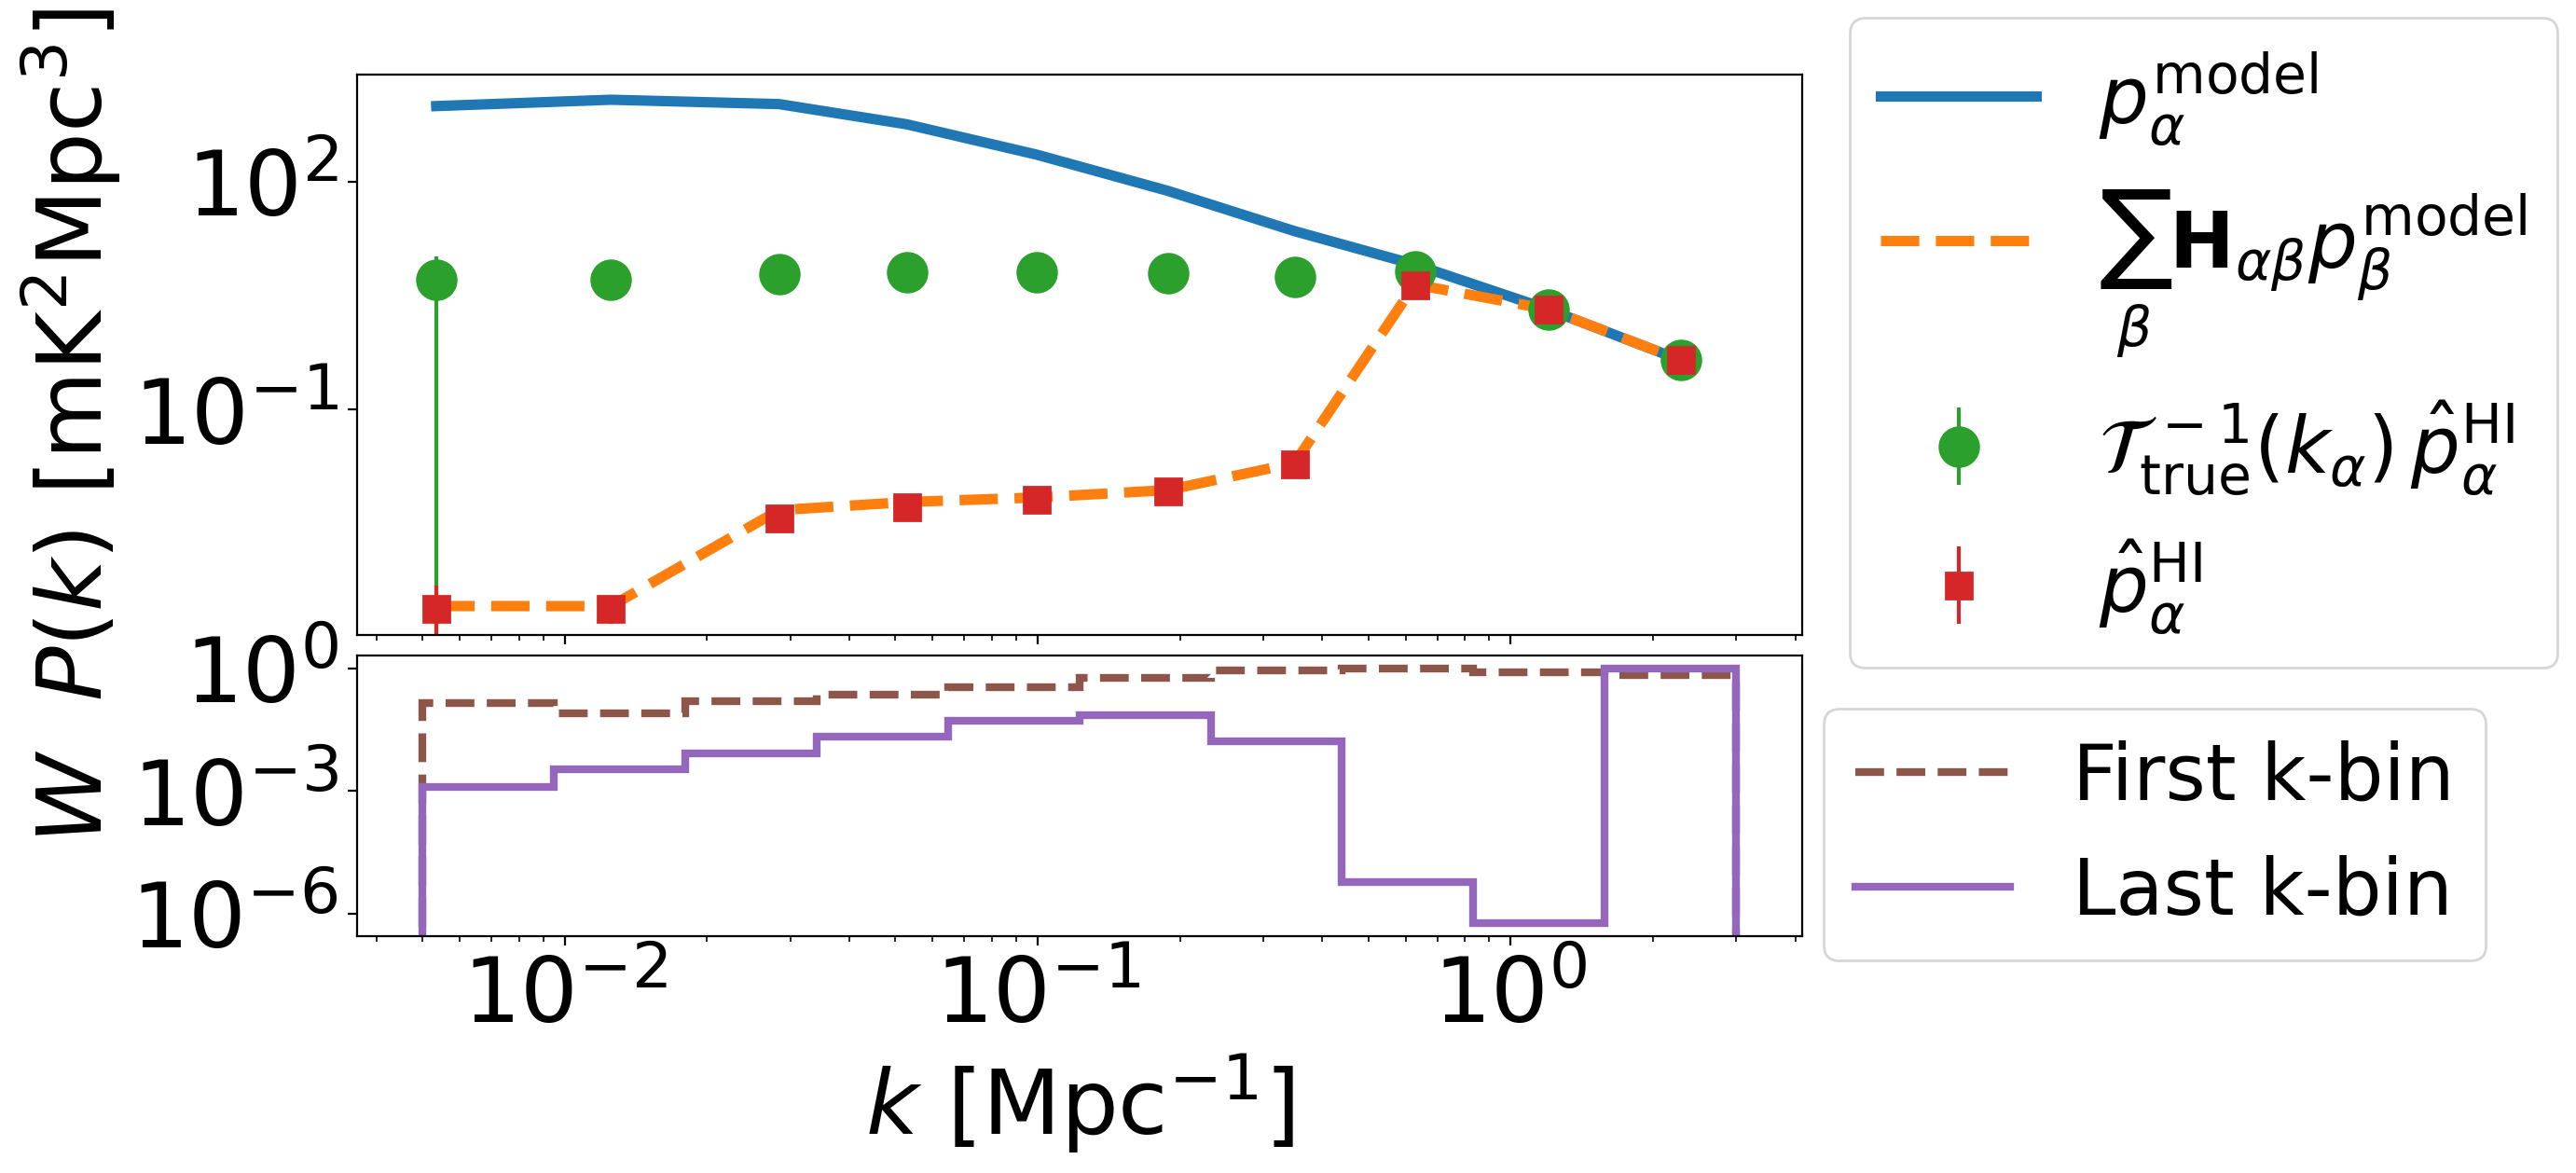

In [252]:
#plt.figure(dpi=200)
fig,axes = plt.subplots(2,1,figsize=(10,6),sharex=True,height_ratios=[2,1],
                        #dpi=200,
                        gridspec_kw={'hspace':0.05})
plt.rcParams['font.size'] = 35
ax = axes[0]
ax.plot(keff,ps_1d_model.mean(0)*1e6,lw=4,
         label=r'${p}^{\rm model}_{\alpha}$')
ax.plot(keff,ps_1d_model_conv.mean(0)*1e6,ls='--',lw=4,
         label=r'$\sum_{\beta}\mathbf{H}_{\alpha\beta}{p}^{\rm model}_{\beta}$')

ax.errorbar(keff,ps_1d_renorm.mean(0)*1e6,yerr=ps_1d_renorm.std(0)*1e6,fmt='o',
            markersize=15,
             label=r'$\mathcal{T}^{\:-1}_{\rm true}(k_\alpha)\,\hat{p}^{\rm HI}_{\alpha}$')
ax.errorbar(keff,ps_1d_cleaned.mean(0)*1e6,yerr=ps_1d_cleaned.std(0)*1e6,fmt='s',
            markersize=10,
             label=r'$\hat{p}^{\rm HI}_{\alpha}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$P(k)$ [mK$^{2}$Mpc$^{3}$]')
ax.legend(loc='upper right',bbox_to_anchor=(1.55, 1.17),prop={'size': 30})

ax = axes[1]
for i in [0,-1]:
    ax.stairs(
        (wf_visual[i])/wf_visual[i].max(),wf_visual_bins,lw=3,ls=['--','-'][i],color='C'+str(i+5),
        label=['First k-bin','Last k-bin'][i]
    )
    #ax.axvline(keff[i],color='C'+str(i+5),ls=['--','-'][i],lw=3)
ax.set_yscale('log')
ax.set_xlabel(r'$k$ [Mpc$^{-1}$]')
ax.set_ylabel(r'${W}$')
ax.set_yticks([1e-6,1e-3,1])
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 0.95),prop={'size': 30})
plt.savefig('wf_visual.png',bbox_inches='tight')
